In [40]:
#  --------------------------------------------projet analyse des donnees : 3iir grp 6---------------------------------------------
#  -------------------------------------------------GROUPE 8  -> disney.csv    ----------------------------------------------------

#  SOUHAIL AZZIMANI .
#  SAAD JDOUA .
#  AMINE IBNOU-CHEIKH . 

#-----------------------------------------------------------------------------------------------------------------------------------

In [2]:
#importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#lecture du dataset 
disney_df = pd.read_csv("C:\\Users\\souhail\\Downloads\\disney.csv")


In [33]:
disney_df.head(5)
# juste pour savoir les noms de collones et les donnes qu on est en train de traiter

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021.0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,2021.0


In [27]:
top_categories_disney = disney_df['listed_in'].value_counts().head(5)
print("\nTop 5 des catégories pour Disney :")
print(top_categories_disney)
# disney_df['listed_in'] -> va selecter la collone nommé 'listed_in' depuis le fichier
# .value_counts() fct qui retourne les occurence de chaque category 
# head(5) va afficher les 5 premiers de value_counts





Top 5 des catégories pour Disney :
listed_in
Animation, Comedy, Family                124
Action-Adventure, Animation, Comedy       77
Action-Adventure, Animation, Kids         45
Action-Adventure, Animation, Family       40
Animals & Nature, Documentary, Family     40
Name: count, dtype: int64


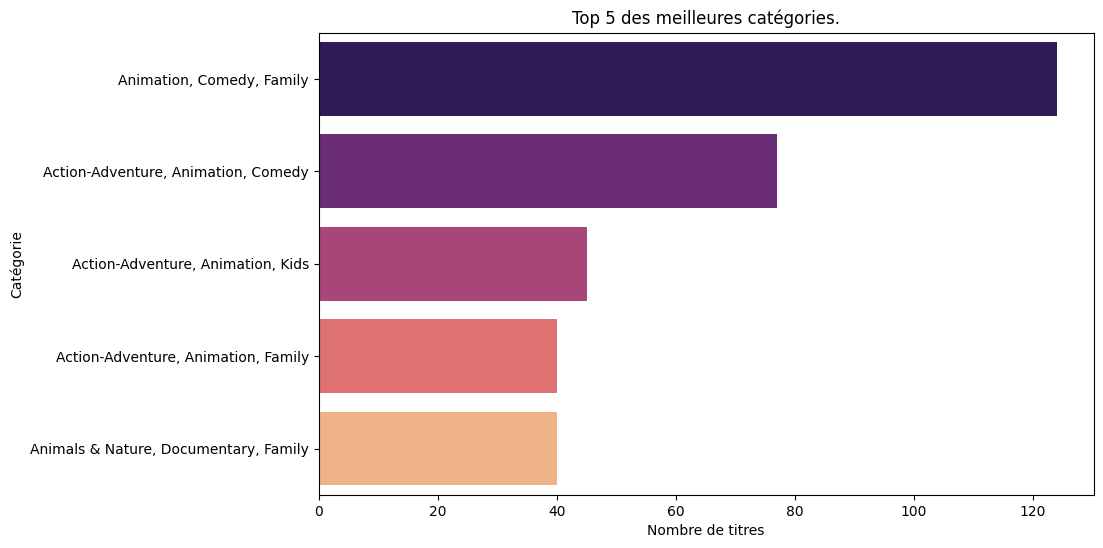

In [28]:
top_categories_disney = disney_df['listed_in'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_disney.values, y=top_categories_disney.index, hue=top_categories_disney.index, dodge=False, palette='magma', legend=False)
plt.xlabel('Nombre de titres')
plt.ylabel('Catégorie')
plt.title('Top 5 des meilleures catégories.')
plt.show()

In [4]:
top_directors_disney = disney_df['director'].value_counts().head(5)
print("\nTop 5 des réalisateurs pour Disney :")
print(top_directors_disney)
# meme logique 


Top 5 des réalisateurs pour Disney :
director
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
Name: count, dtype: int64


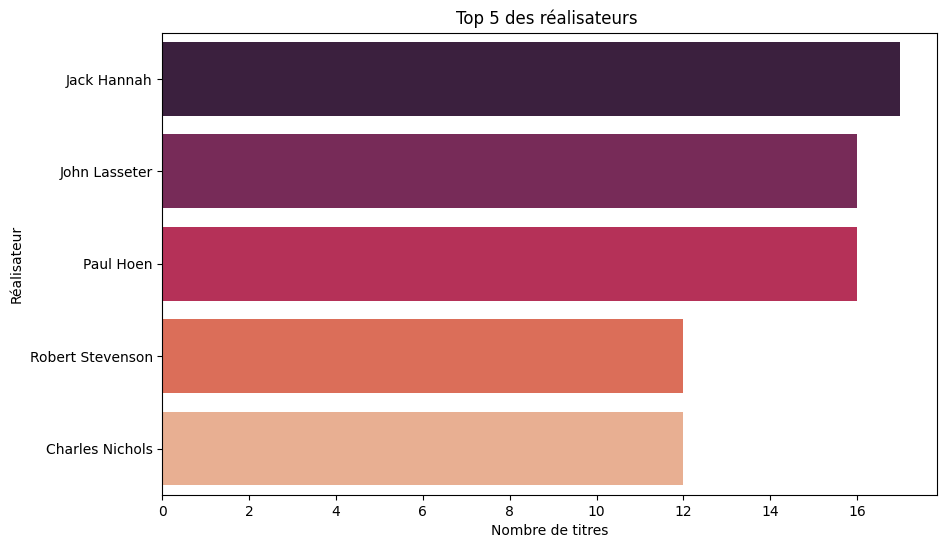

In [29]:
top_directors_disney = disney_df['director'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors_disney.values, y=top_directors_disney.index, hue=top_directors_disney.index, dodge=False, palette='rocket', legend=False)
plt.xlabel('Nombre de titres')
plt.ylabel('Réalisateur')
plt.title('Top 5 des réalisateurs ')
plt.show()

In [7]:
all_actors = disney_df['cast'].str.split(', ', expand=True).stack()
 # Séparer les noms des acteurs et compter les occurrences de chaque acteur

top_actors = all_actors.value_counts().head(10)
#stocker juste les 10 premiers 
print("Les dix meilleurs acteurs :")
print(top_actors)








Les dix meilleurs acteurs :
Jim Cummings            33
Walt Disney             20
Bill Farmer             18
Larry the Cable Guy     17
Tress MacNeille         16
Corey Burton            16
Keith Ferguson          16
Pinto Colvig            15
Bob Peterson            15
Jeff Bennett            15
Name: count, dtype: int64


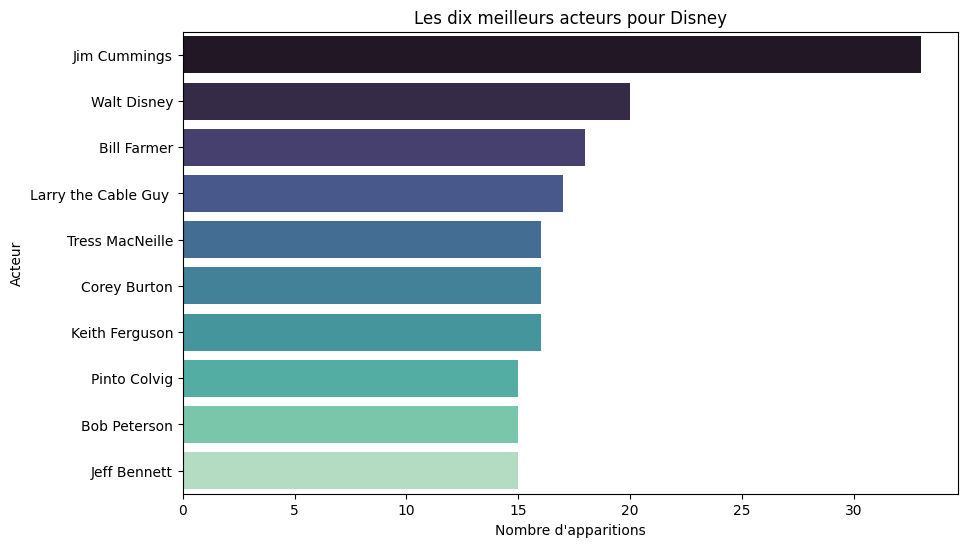

In [22]:
all_actors = disney_df['cast'].str.split(', ', expand=True).stack()
top_actors = all_actors.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, hue=top_actors.index, dodge=False, palette='mako', legend=False)
plt.xlabel('Nombre d\'apparitions')
plt.ylabel('Acteur')
plt.title('Les dix meilleurs acteurs pour Disney')
plt.show()

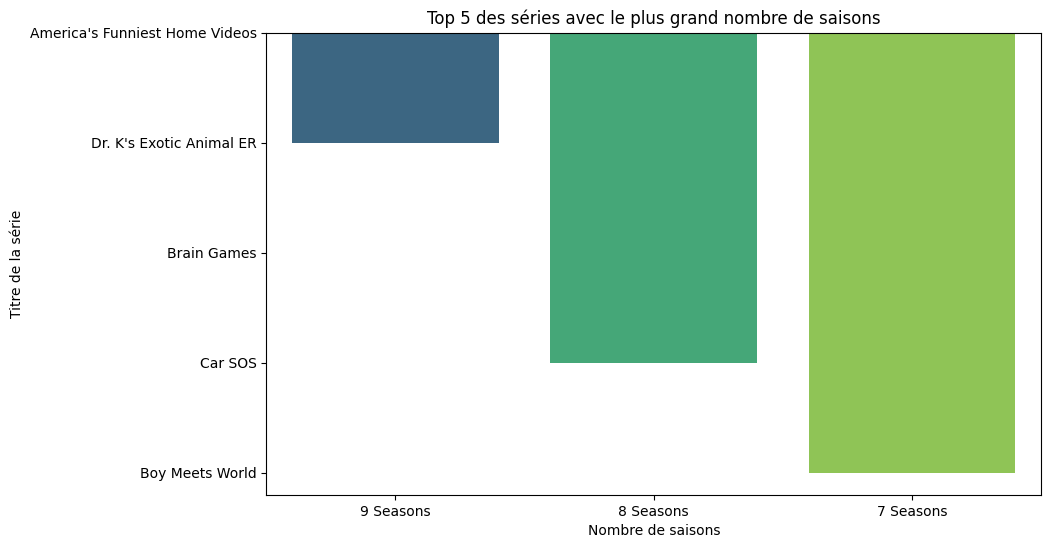

In [30]:

plt.figure(figsize=(10, 6))
sns.barplot(x='duration', y='title', hue='title', data=top_tv_series, palette='viridis', dodge=False)
plt.xlabel('Nombre de saisons')
plt.ylabel('Titre de la série')
plt.title('Top 5 des séries avec le plus grand nombre de saisons')
plt.legend().remove()  
plt.show()


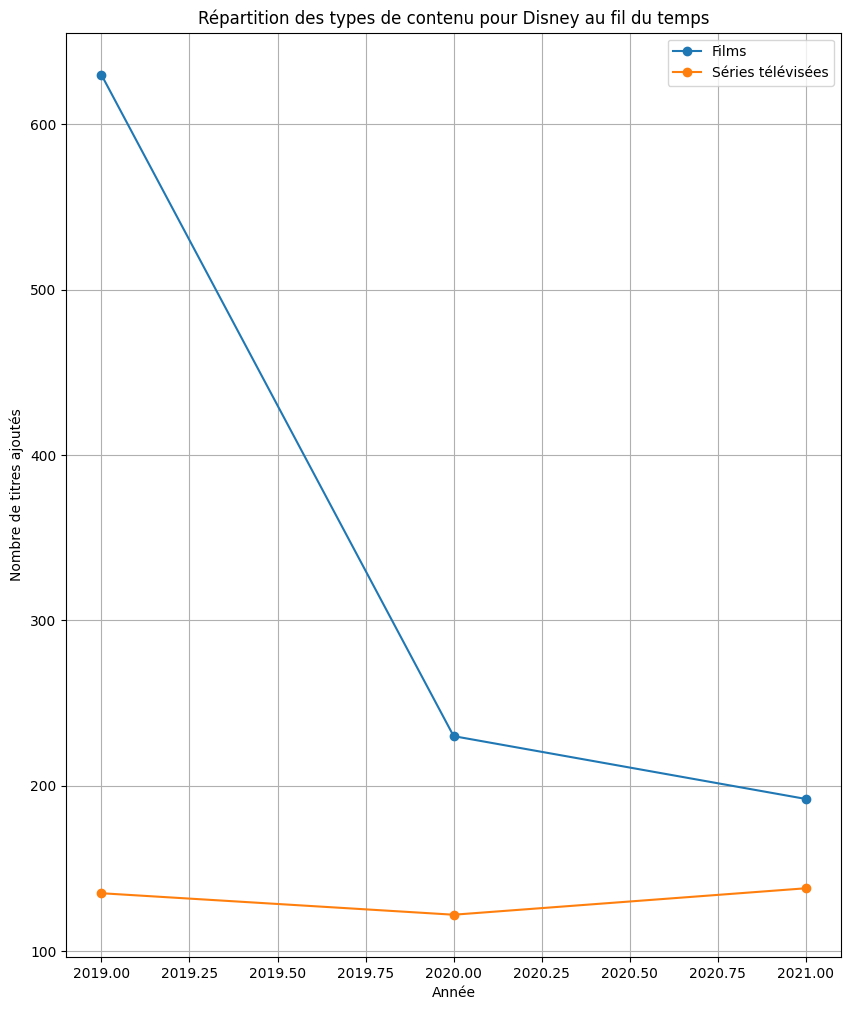

In [36]:

# Convertir la colonne 'date_added' en format datetime
disney_df['date_added'] = pd.to_datetime(disney_df['date_added'])
# Extraire l'année à partir de la colonne 'date_added'
disney_df['year_added'] = disney_df['date_added'].dt.year
# Filtrer les données pour Disney
disney_movies = disney_df[disney_df['type'] == 'Movie']
disney_tv_shows = disney_df[disney_df['type'] == 'TV Show']

# Compter le nombre de films et de séries télévisées pour chaque année
movies_per_year = disney_movies['year_added'].value_counts().sort_index()
tv_shows_per_year = disney_tv_shows['year_added'].value_counts().sort_index()

# Tracer les tendances au fil du temps
plt.figure(figsize=(10, 12))
plt.plot(movies_per_year.index, movies_per_year.values, label='Films', marker='o')
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='Séries télévisées', marker='o')
plt.xlabel('Année')
plt.ylabel('Nombre de titres ajoutés')
plt.title('Répartition des types de contenu pour Disney au fil du temps')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# d apres le graph , on constate que disney a diminue le nombre des titres ajooutes des films , ou le point de changement est pendant l annee 2020 dont
# il ya vait une petite augmentation dans les titres ajoutes des tv shows , alors que la reponse est 'non'  .